In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [11]:
df_total = pd.read_csv('cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [12]:
df = df_total[df_total['estado'] != 'TOTAL']
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


# Exponential increase

In the beginning, was a slow development and then started to grow faster than before

Text(0, 0.5, 'Deaths')

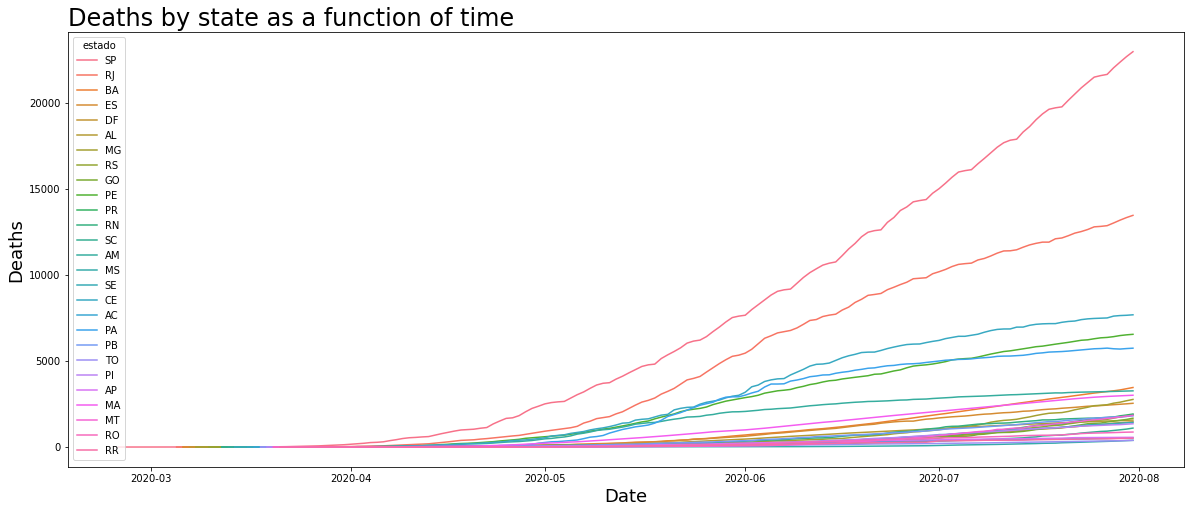

In [13]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Deaths by state as a function of time', loc='left',fontsize=24)
fig.set_xlabel('Date', fontsize=18)
fig.set_ylabel('Deaths', fontsize=18)

Checking if the growth was truly exponential

In [14]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


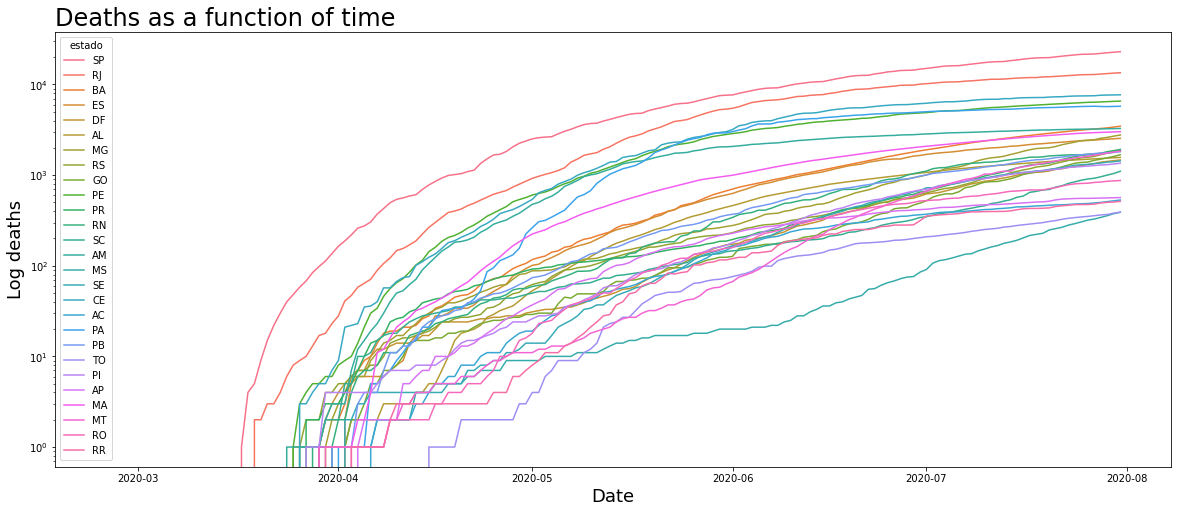

In [18]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.set_title('Deaths as a function of time', loc='left', fontsize=24)
fig.set_xlabel('Date', fontsize=18)
fig.set_ylabel('Log deaths', fontsize=18)
fig.set_yscale('log') # Graphic monolog (in just one axis)

The curve does not reach a Plateau, so it is an exponential curve.

The logarithmic transform reduces the effect of bias and the presence of outliers in data: Assuming that the distribution of the variable in question has a bias, that is, one of the high ends and a long tail, measures such as correlation or regression can be greatly influenced by the peak of the distribution, outliers, among others. Applying the transform can reduce the effect of bias.

In [20]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


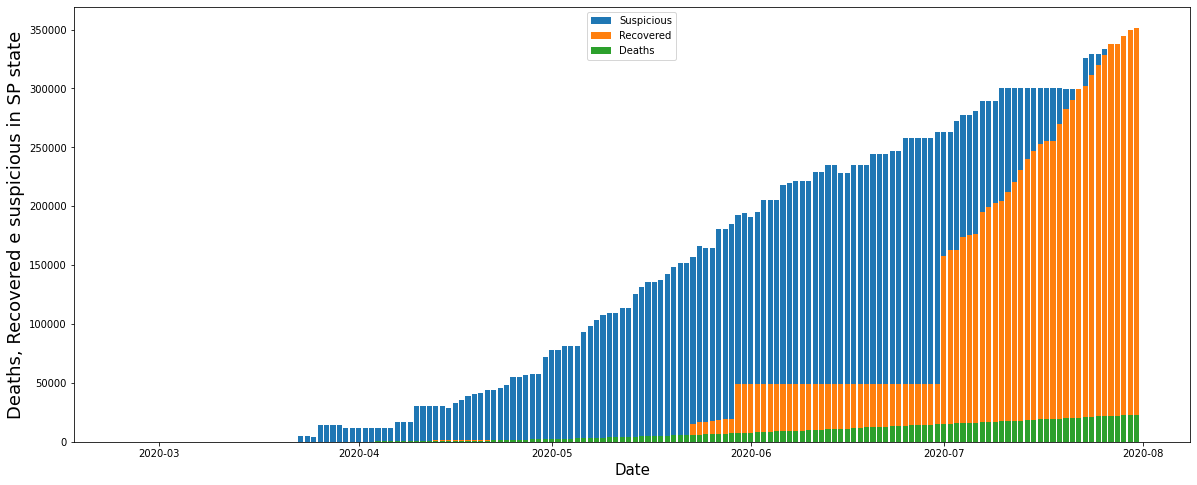

In [22]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data, df_sp.suspeitos, label='Suspicious')
plt.bar(df_sp.data, df_sp.recuperados, label='Recovered')
plt.bar(df_sp['data'], df_sp['Obitos'], label='Deaths')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Deaths, Recovered e suspicious in SP state', fontsize=18, rotation=90)
plt.legend()

At this stage, we can make some research to know why there is no data in July (they are missing).

Before, only recovered data is released for people who were hospitalized and then leave the hospital. Then the methodology changed and people started to see people who were not hospitalized.

[Link](https://g1.globo.com/sp/sao-paulo/noticia/2020/07/01/governo-de-sp-divulga-pela-1a-vez-total-de-recuperados-entre-casos-leves-de-covid-19-e-numero-somados-as-altas-hospitalares-vai-a-157-mil.ghtml)

In [23]:
def plot_lines(title, xlabel, ylabel, x, y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(title, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18, rotation=90)

In [24]:
def plot_bar(title, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(title,loc='left',fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18, rotation=90)

# Acceleration

Acceleration is the rate of change of the velocity of an object with respect to time

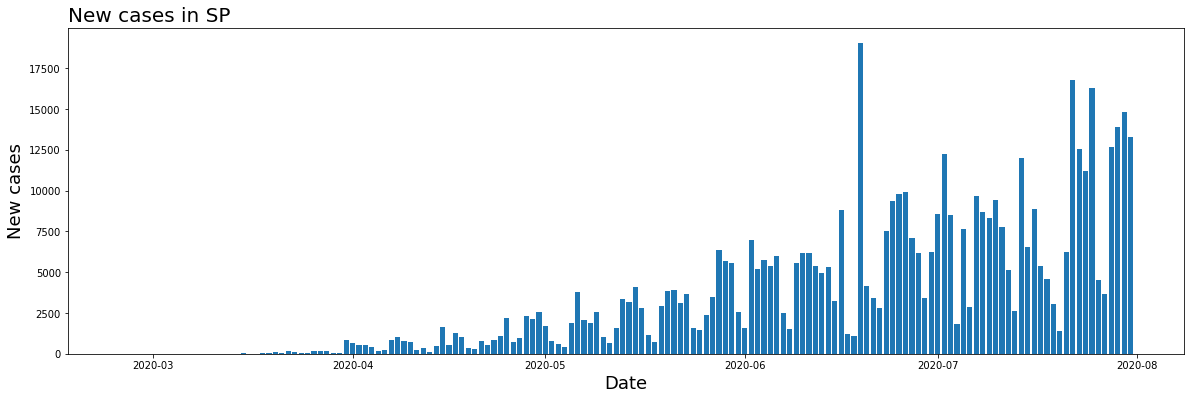

In [25]:
plot_bar('New cases in SP','Date','New cases','data','novosCasos', df_sp)

In [26]:
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


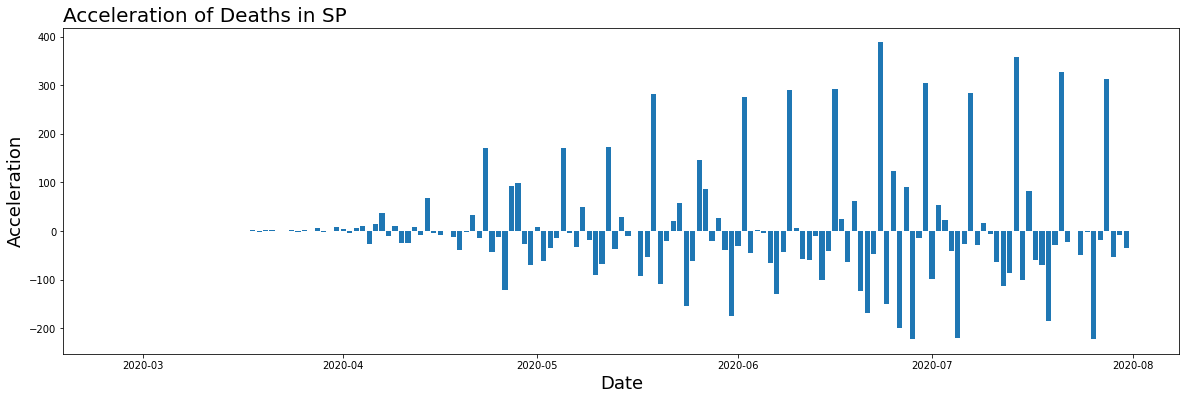

In [27]:
plot_bar('Acceleration of Deaths in SP', 'Date', 'Acceleration', 'data', 'aceleracaoObitos', df_sp)

Notice that we have a very expressive increase on July 1st since that was when the state of São Paulo started to disclose the data of recovered people who were not hospitalized. For this reason, hasty conclusions mustn't be taken.

# Moving average

The difference in cases is that the hospital is on duty on the weekend, so they release the new information at the beginning of the week

## Seasonality

Seasonality, as its name suggested, refers to the seasonal characteristics of the time series data. It is the predictable pattern that repeats at a certain frequency within one year, such as weekly, monthly, quarterly, etc. The most straightforward example to demonstrate seasonality is to look at the temperature data.

For the covid data, we have weekly seasonality 

In [39]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean()
df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN


<BarContainer object of 158 artists>

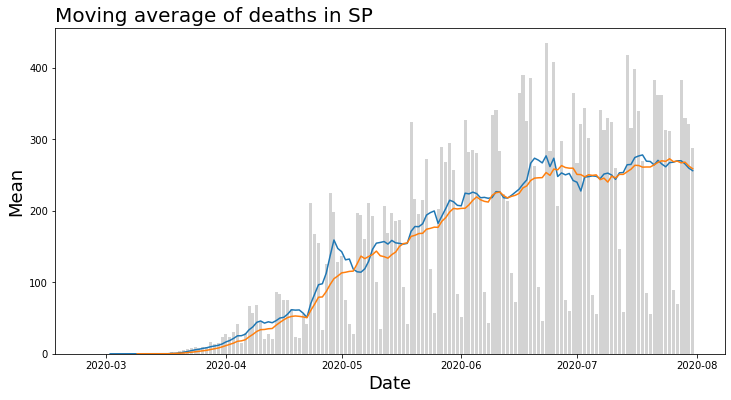

In [29]:
plot_lines('Moving average of deaths in SP', 'Date', 'Mean', 'data', 'mediaObitos', df_sp, None)
plot_lines('Moving average of deaths in SP', 'Date', 'Mean', 'data', 'mediaObitos_14', df_sp, None)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey')

# Correlation and Autocorrelation

$Correlation$ shows the strength of a relationship between two variables and is expressed numerically by the correlation coefficient. The correlation coefficient's values range between -1.0 and 1.0.

$Pearson(linear)$:A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one security moves, either up or down, the other security moves in lockstep, in the same direction. A perfect negative correlation means that two assets move in opposite directions, while a zero correlation implies no linear relationship at all.

$Autocorrelation$ is a mathematical representation of the degree of similarity between a given time series and a lagged version of itself over successive time intervals. It's conceptually similar to the correlation between two different time series, but autocorrelation uses the same time series twice: once in its original form and once lagged one or more time periods. 

[More explanation](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/)

In [31]:
from pandas.plotting import autocorrelation_plot

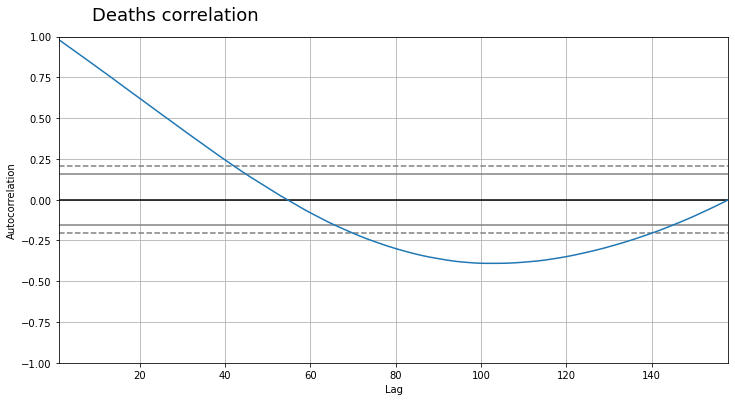

In [33]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Deaths correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['Obitos']) # cumulative value
ax = ax

For this example, each lag represents one day

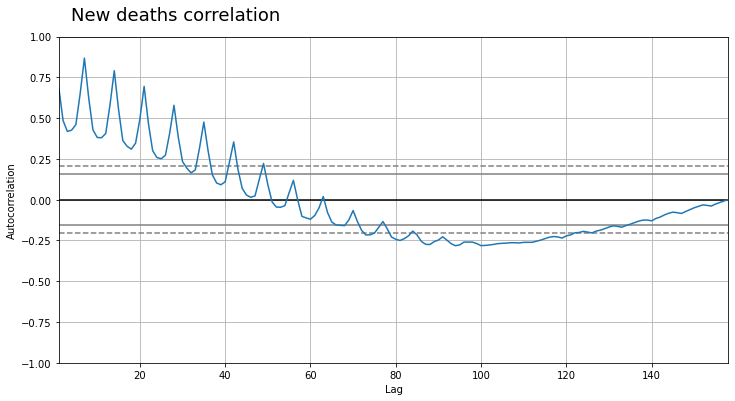

In [37]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('New deaths correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['novosObitos'])
ax=ax

The correlation is getting weaker in 60 days due to the increase of cases

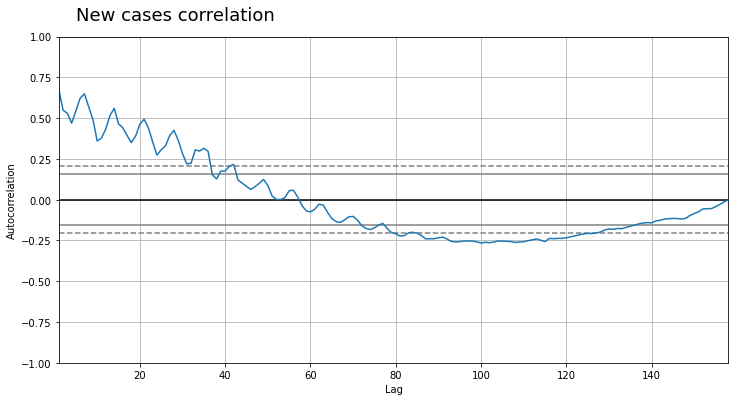

In [36]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('New cases correlation', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['novosCasos'])
ax=ax

Some variations occur caused by the seasonality

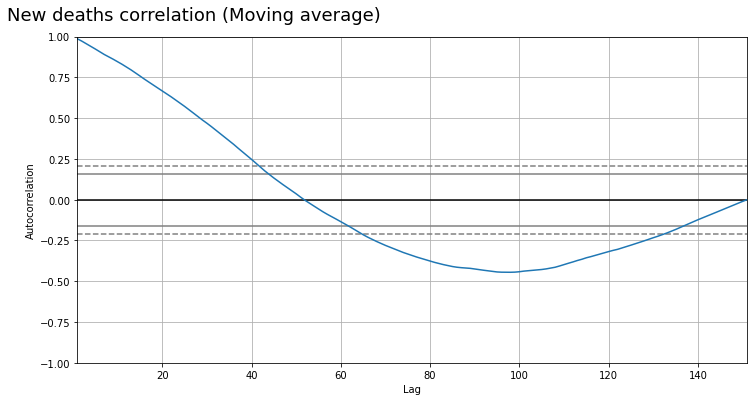

In [38]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('New deaths correlation (Moving average)', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:]) #  without the first seven days
ax=ax

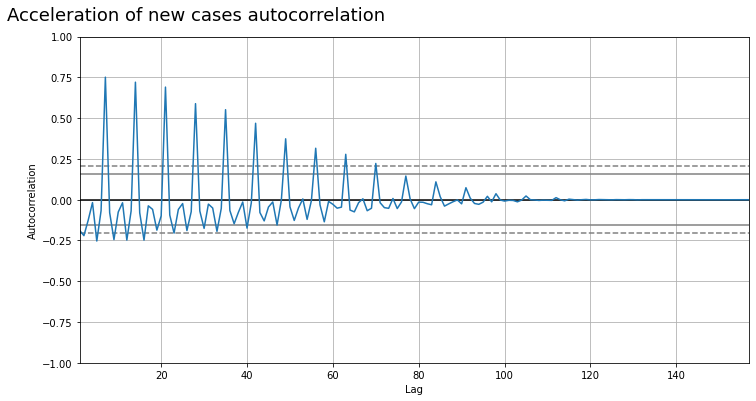

In [40]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Acceleration of new cases autocorrelation',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:]) # It begins after the first day
ax=ax

Although they are commonly known as a measure of the relationship between two variables, they commonly do not denote causality. It is extremely difficult to establish causal relationships from observational data. We need to perform experiments to get more information about a causal relationship. When variables A and B increase together, this could also be related to the change in another variable C, which we are not analyzing. For this reason, it does not imply causality.

In [41]:
df_sp

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.00000,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.00436,0.00000,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.00000,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,31,2020-07-27,Brazil,SP,TOTAL,70,21676,3672,487654,21676,...,1061.98628,0.04445,337434.0,333078.0,1158851.0,2523.68249,-829.0,-19.0,269.714286,269.214286
3875,31,2020-07-28,Brazil,SP,TOTAL,383,22059,12647,500301,21676,...,1089.52823,0.04409,337434.0,334977.0,1158851.0,2523.68249,8975.0,313.0,269.714286,266.785714
3903,31,2020-07-29,Brazil,SP,TOTAL,330,22389,13896,514197,22389,...,1119.79018,0.04354,344501.0,340112.0,1158851.0,2523.68249,1249.0,-53.0,265.285714,267.785714
3931,31,2020-07-30,Brazil,SP,TOTAL,321,22710,14809,529006,22710,...,1152.04041,0.04293,349287.0,340112.0,1788225.0,3894.29886,913.0,-9.0,259.428571,262.285714


In [42]:
df_sp['mediaAccObitos'] = df_sp['aceleracaoObitos'][1:].rolling(window=7,center=False).mean()

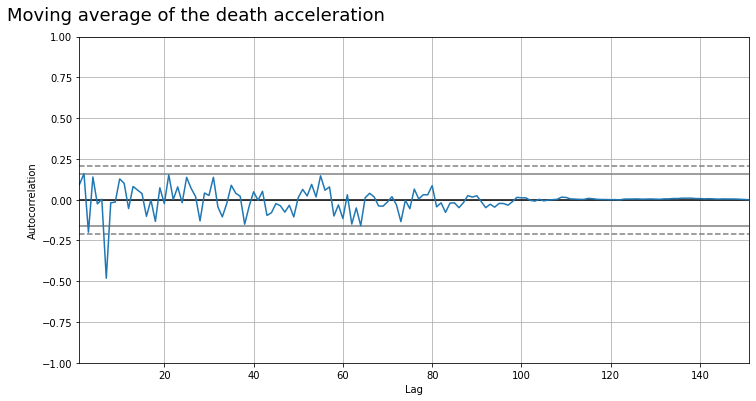

In [44]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Moving average of the death acceleration',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['mediaAccObitos'][7:])
ax=ax

In [45]:
df_sp['mes'] = pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name() # weekday_name
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mediaAccObitos,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-02-29,Saturday


In [ ]:
dias_traduzidos = {'Monday':'Segunda','Tuesday':'Terça','Wednesday':'Quarta',
                  'Thursday':'Quinta','Friday':'Sexta','Saturday':'Sabado',
                  'Sunday':'Domingo'}

In [ ]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

In [46]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()

In [48]:
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp.head(7)

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Friday,7342.0,177.0,-13.0,Friday
Monday,6887.0,41.0,-20.0,Monday
Saturday,6786.0,155.0,-17.0,Saturday
Sunday,6846.0,60.0,-95.0,Sunday
Thursday,7165.0,190.0,9.0,Thursday
Tuesday,6794.0,206.0,175.0,Tuesday
Wednesday,6975.0,181.0,-25.0,Wednesday


In [49]:
agrupados_sp = agrupados_sp.reindex([
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'thursday', 'Friday', 'Saturday'
])

<AxesSubplot:xlabel='dia_da_semana', ylabel='novosObitos'>

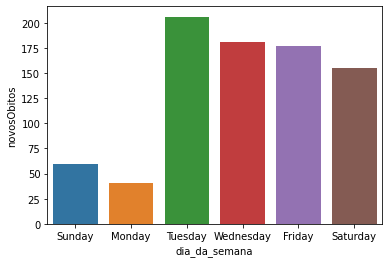

In [50]:
sns.barplot(agrupados_sp['dia_da_semana'],agrupados_sp.novosObitos)

Covid-19 may become seasonal disease - [Read more](https://super.abril.com.br/saude/covid-19-deve-se-tornar-doenca-sazonal-sugere-estudo/)

In [57]:
def create_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.weekday #dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    
    X = df[['diasemana','mês','diamês']]
    
    if label:
        y = df[label]
        return X,y
    return X

In [58]:
X, y = create_features(df_sp, label='Obitos')
df_final = pd.concat([X,y], axis=1)
df_final.head(10)

,diasemana,mês,diamês,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


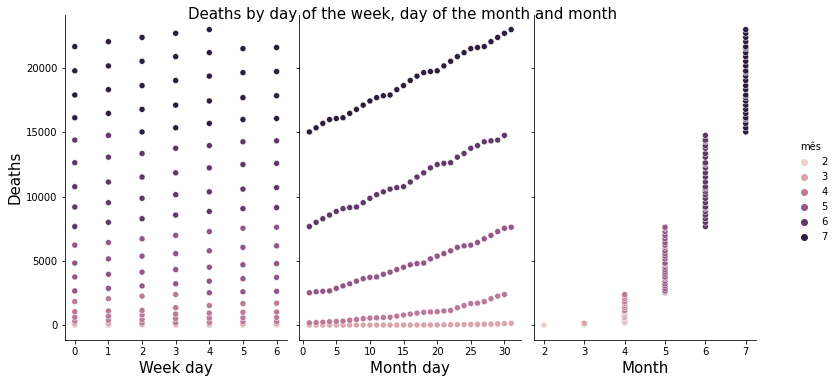

In [59]:
g = sns.pairplot(df_final.dropna(),
                hue='mês',
                x_vars=['diasemana', 'diamês', 'mês'],
                y_vars='Obitos')

g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Week day', fontsize=15)
g.axes[0,1].set_xlabel('Month day', fontsize=15)
g.axes[0,2].set_xlabel('Month', fontsize=15)
g.axes[0,0].set_ylabel('Deaths', fontsize=15)

plt.suptitle('Deaths by day of the week, day of the month and month',fontsize=15)
plt.show()

In [77]:
def create_features2(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    df['semana'] = df['mes'].dt.weekofyear

    X = df[['diasemana','mês','diamês','semana']]

    if label:
        y = df[label]
        return X,y
    return X

In [78]:
X, y = create_features2(df_sp, label='Obitos')
df_final2 = pd.concat([X,y], axis=1)
df_final2.head(10)

,diasemana,mês,diamês,semana,Obitos
0,1,2,25,9,0
2,2,2,26,9,0
4,3,2,27,9,0
6,4,2,28,9,0
8,5,2,29,9,0
10,6,3,1,9,0
12,0,3,2,10,0
14,1,3,3,10,0
16,2,3,4,10,0
19,3,3,5,10,0


Text(0.5, 0.98, 'Deaths per week')

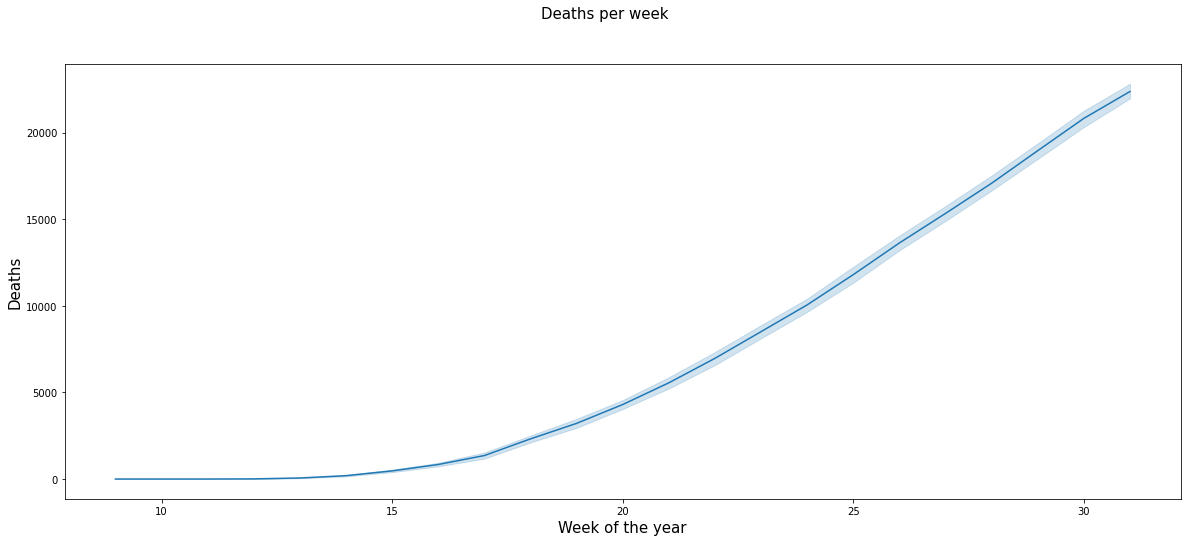

In [81]:
plt.figure(figsize=(20,8))
g = sns.lineplot(x='semana',y='Obitos',data=df_final2)

g.axes.set_xlabel('Week of the year',fontsize=15)
g.axes.set_ylabel('Deaths',fontsize=15)

plt.suptitle('Deaths per week',fontsize=15)